# Two states economy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Return and return rate

In [2]:
c = (-10, 12) #cash flow
R = sum(c)
R # return

2

In [3]:
r = R/abs(c[0])
r # rate of return

0.2

### interest and present value

In [4]:
i = 0.1 # interest

In [5]:
def D(c1): #discounting oppotunity costs
    return c1/(1+i)

In [6]:
# present value
D(abs(c[0]))

9.09090909090909

### net present value

In [7]:
def NPV(c):
    return c[0] + D(c[1])

In [8]:
cA = (-10.5, 12.1)

In [9]:
cB = (-10.5, 11)

In [10]:
NPV(cA) # investing makes sense

0.4999999999999982

In [11]:
NPV(cB) # investing in this doesn't make sense

-0.5

###  Uncertainty over Financial assets and price process

In [12]:
S0 = 10 #asset

In [14]:
S1 = np.array((12.5, 7.5)) # two states

In [16]:
S = (S0, S1) #price process
S

(10, array([12.5,  7.5]))

### Risk and expectation

In [17]:
p = 0.4 #apriori probability of economic state
P = np.array([p, 1-p]) # probability measure

In [22]:
S0 = 10
S1 = np.array([20,5])
np.dot(P,S1) #Expectated value of S0 after a year

11.0

In [23]:
def expected_return(S0,S1,P):
    return np.dot(P,S1) - S0

In [24]:
expected_return(S0, S1, P)

1.0

In [27]:
def exp_return_rate(x0,x1,p): #alternatively denoted as mu in econometrics
    return expected_return(x0,x1,p)/x0

In [34]:
mu = exp_return_rate(S0,S1,P)
mu

0.1

### volatility
standard deviation of rate of return

In [32]:
def r(x0,x1):
    return (x1-x0)/x0

In [33]:
r(S0,S1)

array([ 1. , -0.5])

In [39]:
def volatility(P,r,mu):
    variance = np.dot(P, (r-mu)**2)
    return np.sqrt(variance), variance

In [43]:
sigma,sigma2 = volatility(P,r(S0,S1), exp_return_rate(S0,S1,P))
sigma

0.7348469228349535

## contingent claim
* call option
* replication
* arbitrage pricing

In [46]:
S1 = np.arange(20)
S1[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [48]:
K = 10 # strike price

In [51]:
C1 = np.maximum(S1-K,0) # pay off on call option
C1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
from pylab import mpl

In [57]:
plt.style.use('seaborn')

/tmp/ipykernel_5166/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [58]:
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

Text(0, 0.5, '$C_1$')

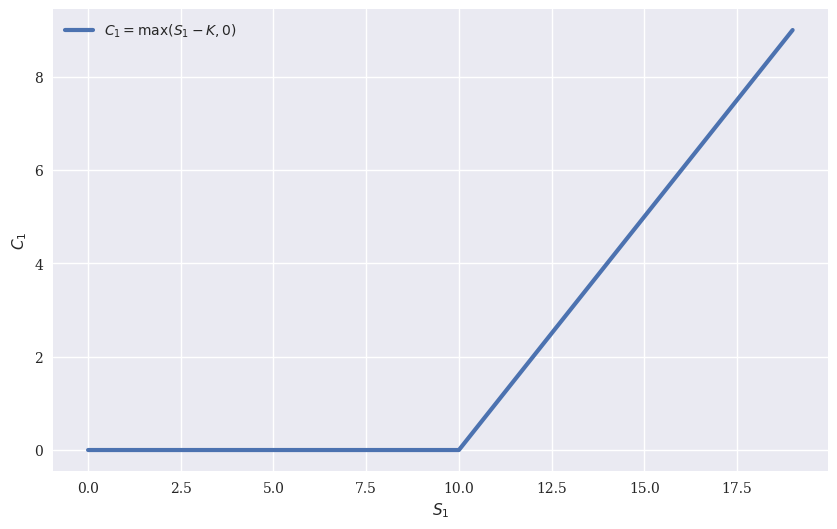

In [59]:
plt.figure(figsize=(10,6))
plt.plot(S1,C1,lw=3.0, label='$C_1 = \max(S_1 - K, 0)$')
plt.legend(loc=0)
plt.xlabel('$S_1$')
plt.ylabel('$C_1$')

### Replication

In [60]:
B = (10, np.array((11,11))) #price process for riskless bond
S = (10, np.array((20,5))) #price process for risky stock

In [61]:
M = np.array((B[1], S[1])).T

In [62]:
M

array([[11, 20],
       [11,  5]])

In [63]:
K = 15 #strike price for the call option

In [64]:
C1 = np.maximum(S[1] - K, 0)
C1 #values of payoff vector in one year

array([5, 0])

In [65]:
phi = np.linalg.solve(M,C1)
phi

array([-0.15151515,  0.33333333])

### Arbitrage Pricing

An arbitrage is a trading strategy $phi$ that creates risk-less profit out of an investment of zero. Such economy is not viable

In [66]:
C0 = np.dot(phi, (B[0], S[0]))
C0

1.8181818181818181